In [248]:
# Import all necissary libraries and variables
import matplotlib.pyplot as plt
import pandas as pd
darkgrey = 'grey'
lightgrey = '#D3D3D3'

In [249]:
# Load the dataset
df = pd.read_csv("SpotifyFeatures.csv")  # adjust filename/path

# Quick look at the data
print(df.columns)

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [250]:
########################################################################################################################################################################
#
#
#
#                                                           GENRE POPULARITY
#
#
#
########################################################################################################################################################################

In [251]:
# Drop missing values in critical columns
df = df.dropna(subset=['genre', 'popularity'])

# Standardize text (in case of inconsistent capitalization)

df['genre'] = df['genre'].str.lower().str.strip()
# Average popularity by genre
genre_popularity = df.groupby('genre')['popularity'].mean().reset_index()

# Sort for readability
genre_popularity = genre_popularity.sort_values(by='popularity', ascending=False)
print(genre_popularity.head(25))

               genre  popularity
17               pop   66.590667
19               rap   60.533795
22              rock   59.619392
12           hip-hop   58.423131
9              dance   57.275256
13             indie   54.701561
5   children’s music   54.659040
18               r&b   52.308719
1        alternative   50.213430
11              folk   49.940209
24              soul   47.027836
8            country   46.100416
14              jazz   40.824383
10        electronic   38.056095
21         reggaeton   37.742915
20            reggae   35.589328
26             world   35.524077
3              blues   34.742879
25        soundtrack   33.954800
6          classical   29.282195
23               ska   28.612351
2              anime   24.258729
7             comedy   21.342630
16             opera   13.335628
15             movie   12.174097


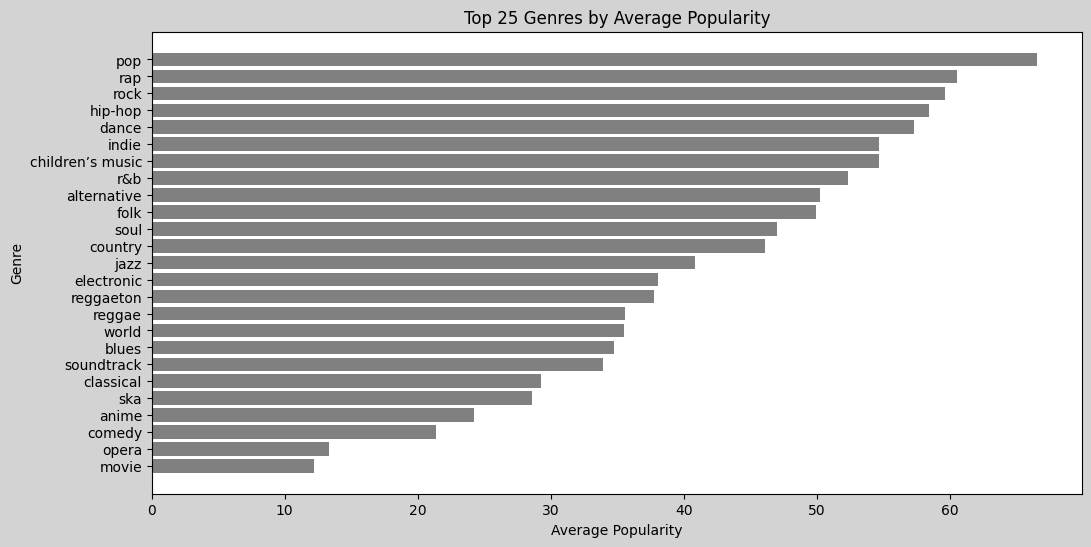

In [252]:
# Bar Chart - Top 10 genres by average popularity
top25 = genre_popularity.head(25)

plt.figure(figsize=(12,6), facecolor=lightgrey )
plt.barh(top25['genre'], top25['popularity'], facecolor=darkgrey)
plt.gca().invert_yaxis()  # highest at top
plt.title("Top 25 Genres by Average Popularity")
plt.xlabel("Average Popularity")
plt.ylabel("Genre")
plt.savefig('A1.png', bbox_inches='tight')
plt.show()


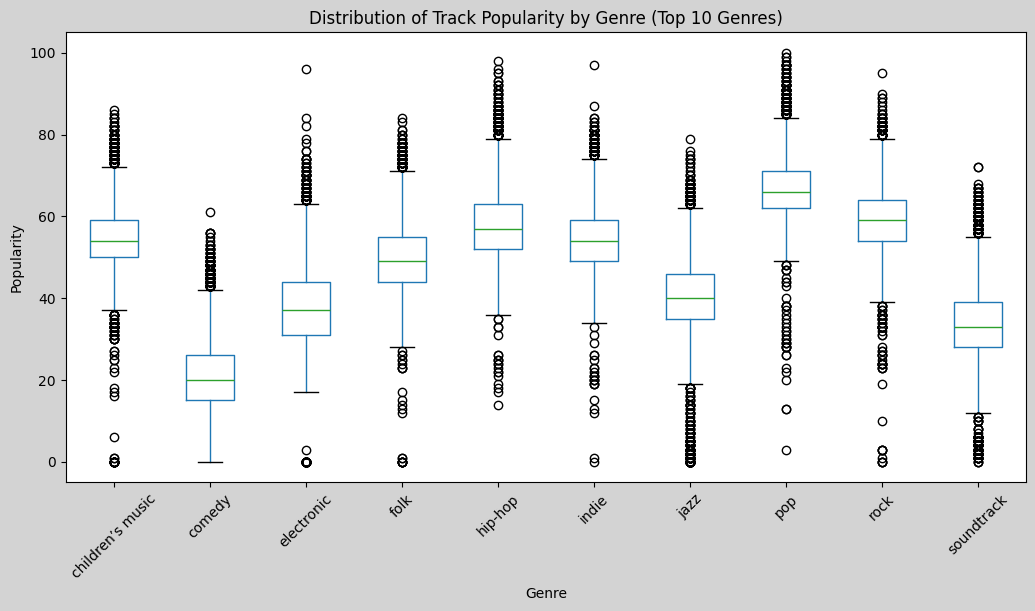

In [253]:
top_genres = df['genre'].value_counts().head(10).index
df_top = df[df['genre'].isin(top_genres)]

fig = plt.figure(figsize=(12,6), facecolor=lightgrey)  # full figure bg
ax = fig.add_subplot(111)  # manually add subplot so we can control it

df_top.boxplot(column='popularity', by='genre', grid=False, rot=45, ax=ax)

# titles and labels
ax.set_title("Distribution of Track Popularity by Genre (Top 10 Genres)")
plt.suptitle("")  
ax.set_xlabel("Genre")
ax.set_ylabel("Popularity")

plt.savefig('A2.png', bbox_inches='tight')
plt.show()



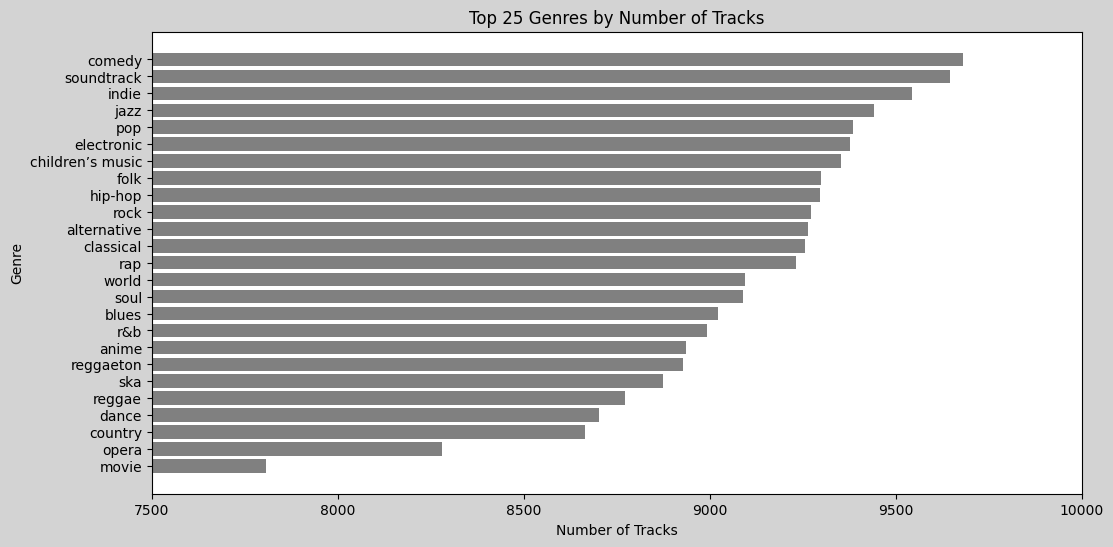

In [254]:
# Count the number of songs per genre
genre_counts = df['genre'].value_counts().head(25)

plt.figure(figsize=(12,6), facecolor=lightgrey)
plt.barh(genre_counts.index, genre_counts.values, color=darkgrey)
plt.gca().invert_yaxis()
plt.title("Top 25 Genres by Number of Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Genre")
plt.xlim(xmin=7500, xmax=10000) 
plt.savefig('A3.png', bbox_inches='tight')
plt.show()


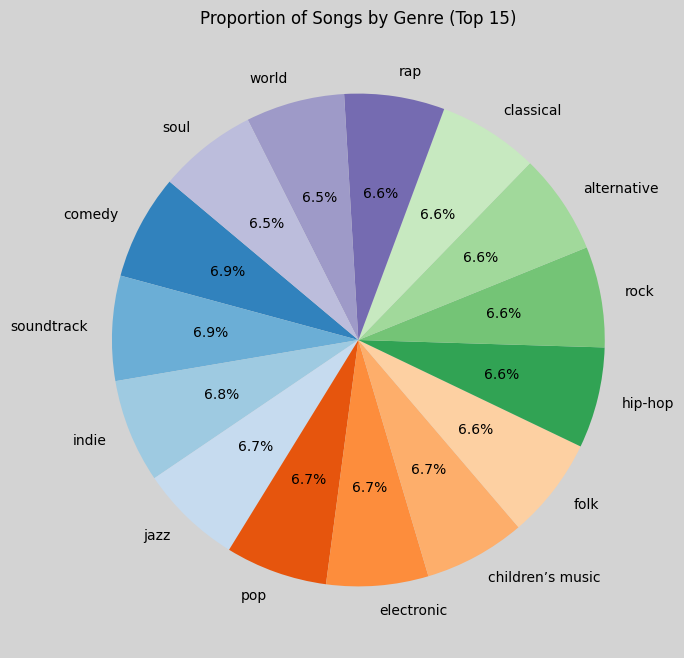

In [255]:
# Pie chart for top 8 genres by track count
top8 = genre_counts.head(15)

plt.figure(figsize=(8,8), facecolor=lightgrey)
plt.pie(top8.values, labels=top8.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20c.colors)
plt.title("Proportion of Songs by Genre (Top 15)")
plt.savefig('A4.png', bbox_inches='tight')
plt.show()


In [256]:
########################################################################################################################################################################
#
#
#
#                                                     ARTIST POPULARITY
#
#
#
########################################################################################################################################################################

In [257]:
# Drop missing values in critical columns
df = df.dropna(subset=['artist_name', 'popularity'])

# Standardize text (in case of inconsistent capitalization)
df['artist_name'] = df['artist_name'].str.lower().str.strip()

# Average popularity by artist
artist_popularity = df.groupby('artist_name')['popularity'].mean().reset_index()

# Sort for readability
artist_popularity = artist_popularity.sort_values(by='popularity', ascending=False)
print(artist_popularity.head(25))

                artist_name  popularity
9944             pedro capó   87.000000
8262         mario bautista   85.000000
8430            mau y ricky   83.000000
7181   kris kross amsterdam   82.000000
9398                  ninho   82.000000
9763            paloma mami   82.000000
8314          martin garrix   81.857143
11661           sofia reyes   81.500000
6942              kenny man   81.000000
9492                    nsg   81.000000
5276        heuss l'enfoiré   81.000000
707                  anitta   81.000000
10115               piso 21   80.500000
1425          billie eilish   80.500000
7481              lele pons   80.000000
58            4 non blondes   80.000000
10412                  ramz   80.000000
10811                rombai   80.000000
4973          grupo arranke   80.000000
2722                 coolio   80.000000
6600            juan karlos   80.000000
6045                 jennie   80.000000
14271              xo cupid   79.500000
6860    katrina & the waves   79.000000


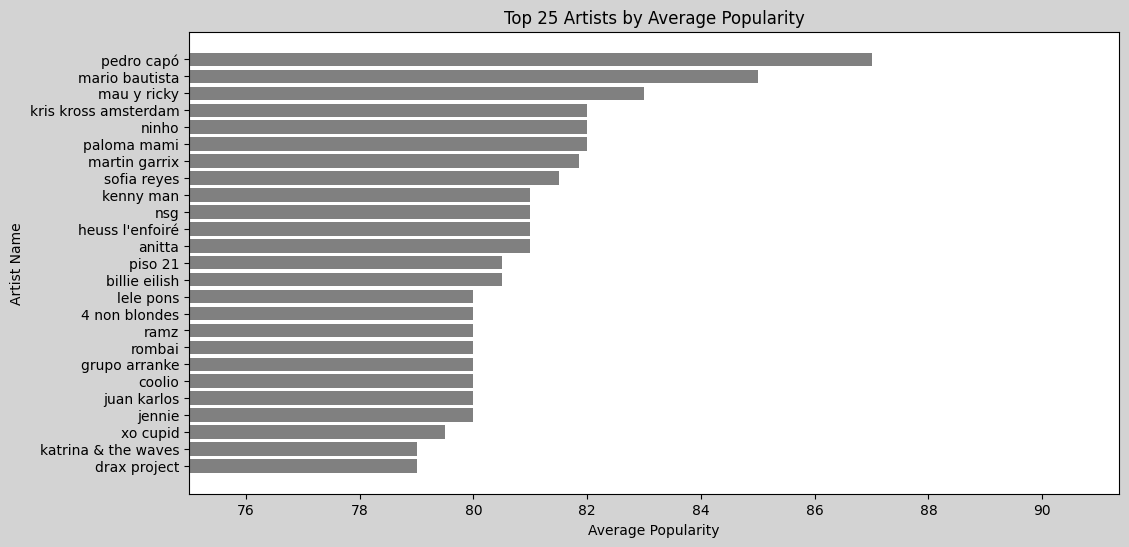

In [258]:
# Bar Chart - Top 25 artists by average popularity
top25 = artist_popularity.head(25)

plt.figure(figsize=(12,6), facecolor=lightgrey )
plt.barh(top25['artist_name'], top25['popularity'], color=darkgrey)
plt.gca().invert_yaxis()  # highest at top
plt.title("Top 25 Artists by Average Popularity")
plt.xlabel("Average Popularity")
plt.ylabel("Artist Name")
plt.xlim(xmin=75)
plt.savefig('B1.png', bbox_inches='tight')
plt.show()

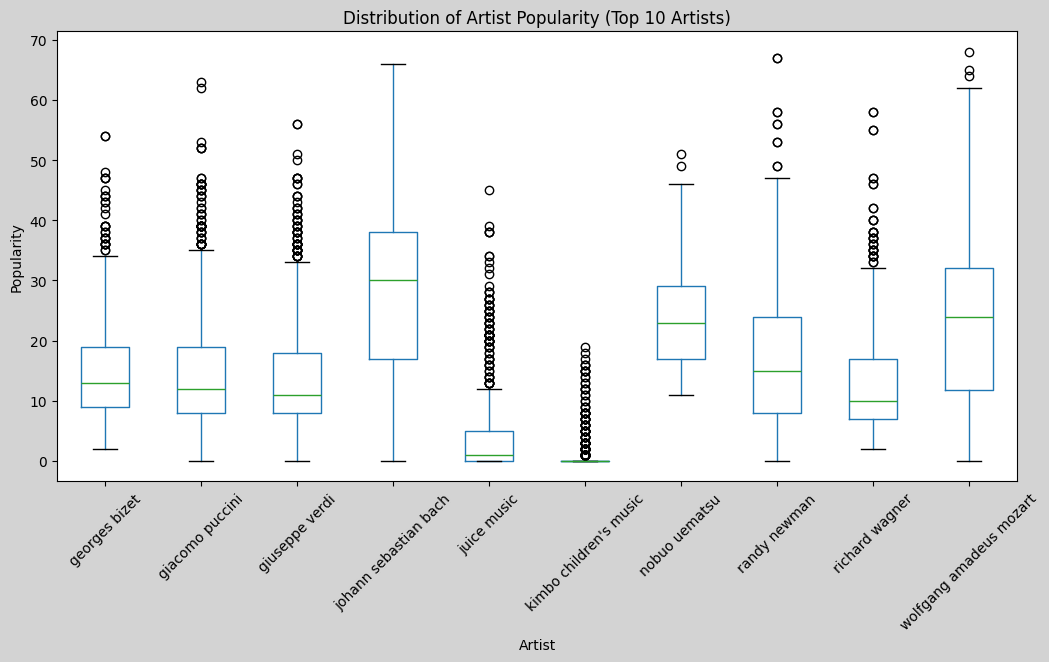

In [259]:
top_artists = df['artist_name'].value_counts().head(10).index
df_top = df[df['artist_name'].isin(top_artists)]

fig = plt.figure(figsize=(12,6), facecolor=lightgrey)  # full figure bg
ax = fig.add_subplot(111)  # manually add subplot so we can control it

df_top.boxplot(column='popularity', by='artist_name', grid=False, rot=45, ax=ax)

# titles and labels
ax.set_title("Distribution of Artist Popularity (Top 10 Artists)")
plt.suptitle("")  
ax.set_xlabel("Artist")
ax.set_ylabel("Popularity")

plt.savefig('B2.png', bbox_inches='tight')
plt.show()

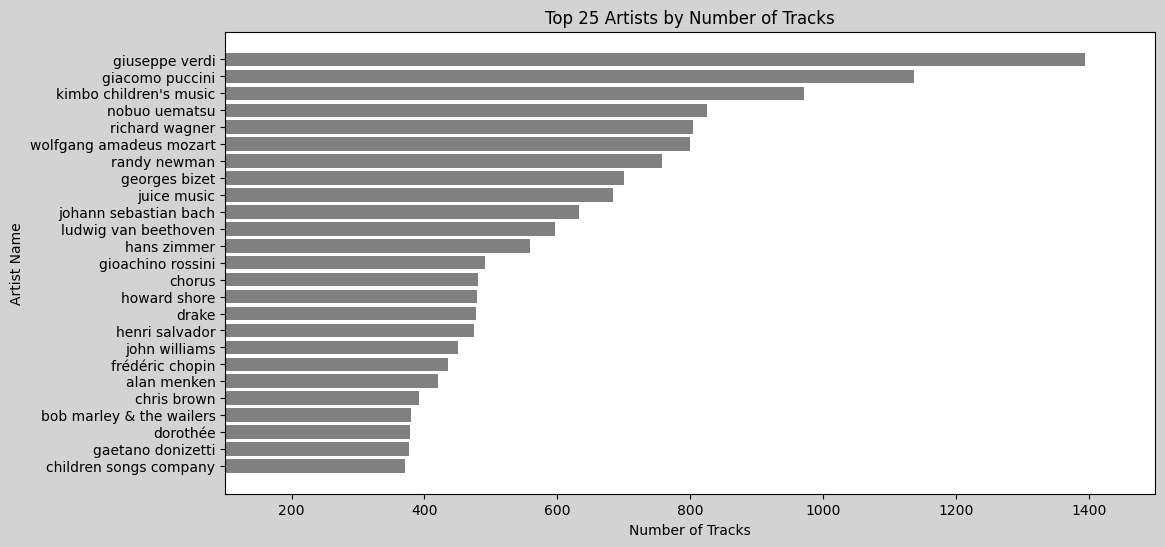

In [260]:
# Count the number of songs per artist
artist_counts = df['artist_name'].value_counts().head(25)

plt.figure(figsize=(12,6), facecolor=lightgrey )
plt.barh(artist_counts.index, artist_counts.values, color=darkgrey)
plt.gca().invert_yaxis()
plt.title("Top 25 Artists by Number of Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist Name")
plt.xlim(xmin=100, xmax=1500) 
plt.savefig('B3.png', bbox_inches='tight')
plt.show()


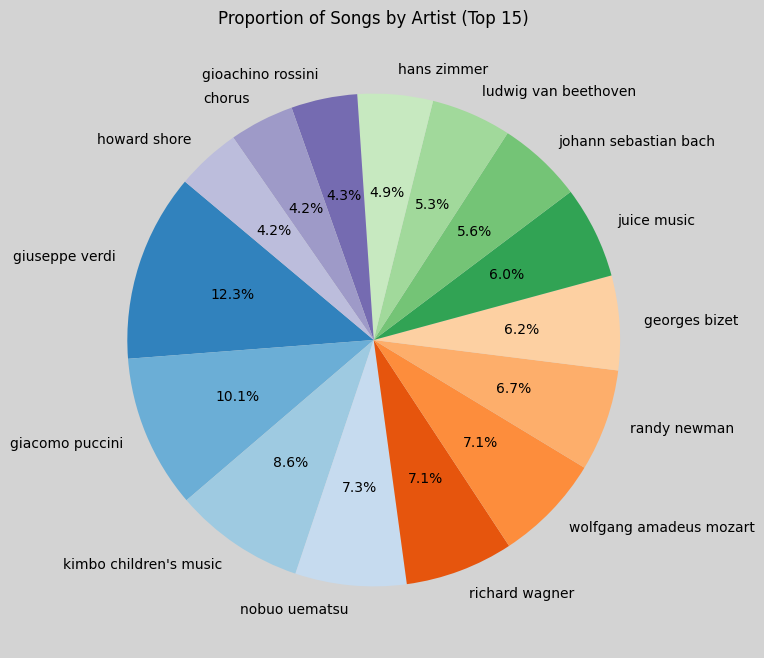

In [261]:
# Pie chart for top 15 artists by track count
top8 = artist_counts.head(15)

plt.figure(figsize=(8,8), facecolor=lightgrey )
plt.pie(top8.values, labels=top8.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20c.colors)
plt.title("Proportion of Songs by Artist (Top 15)")
plt.savefig('B4.png', bbox_inches='tight')
plt.show()


In [262]:
########################################################################################################################################################################
#
#
#
#                                                     KEY POPULARITY
#
#
#
########################################################################################################################################################################

In [263]:
# Drop missing values in critical columns
df = df.dropna(subset=['key', 'popularity'])

# Standardize text (in case of inconsistent capitalization)
df['key'] = df['key'].str.lower().str.strip()

# Average popularity by genre
key_popularity = df.groupby('key')['popularity'].mean().reset_index()

# Sort for readability
key_popularity = key_popularity.sort_values(by='popularity', ascending=False)
print(key_popularity.head(25))

   key  popularity
4   c#   43.697341
2    b   43.479758
9   f#   43.100972
11  g#   42.890956
7    e   40.724727
0    a   40.501566
1   a#   40.427283
3    c   40.387920
8    f   39.979782
5    d   39.971757
10   g   39.922963
6   d#   38.142744


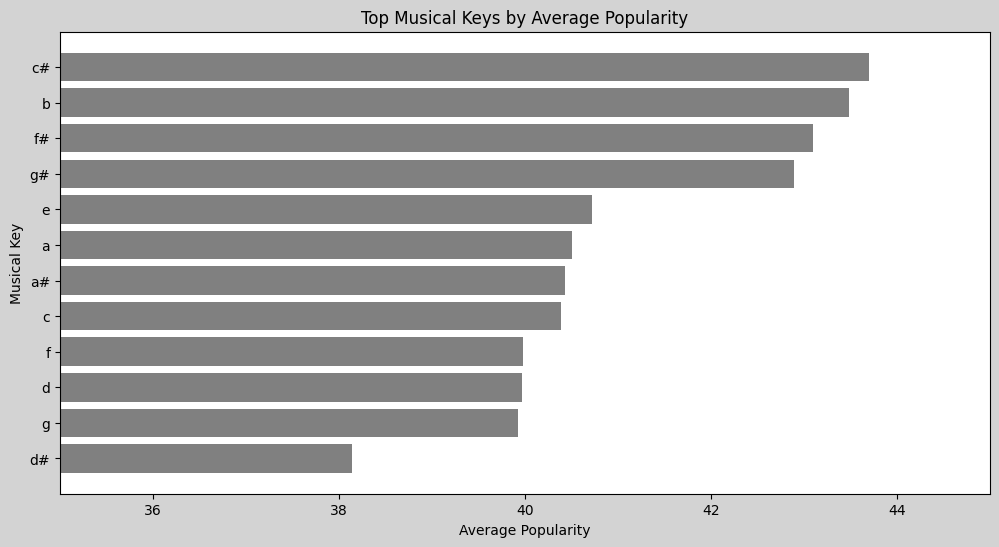

In [264]:
# Bar Chart - Top 25 keys by average popularity
top25 = key_popularity.head(25)

plt.figure(figsize=(12,6), facecolor=lightgrey )
plt.barh(top25['key'], top25['popularity'], color=darkgrey)
plt.gca().invert_yaxis()  # highest at top
plt.title("Top Musical Keys by Average Popularity")
plt.xlabel("Average Popularity")
plt.ylabel("Musical Key")
plt.xlim(xmin=35, xmax=45) 
plt.savefig('C1.png', bbox_inches='tight')
plt.show()

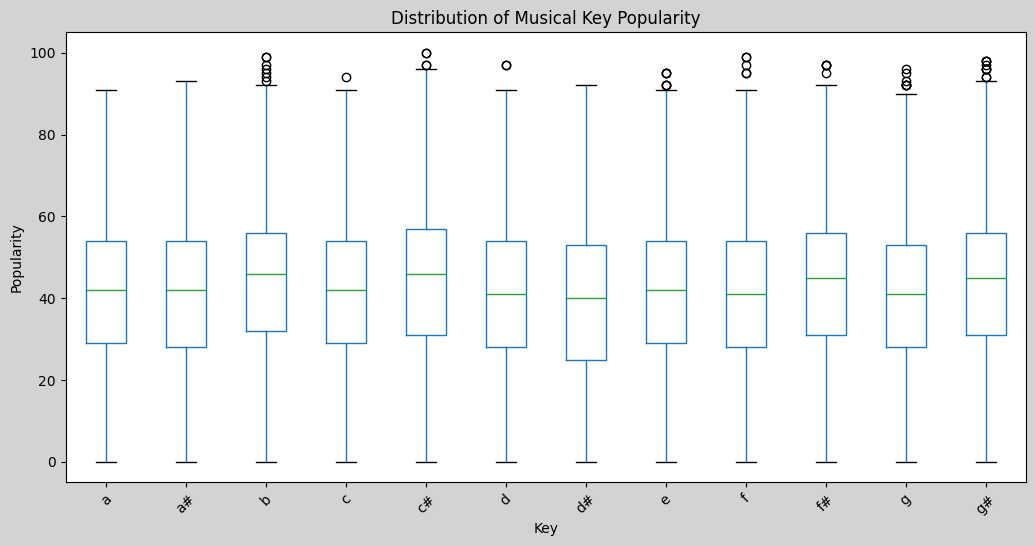

In [265]:
top_keys = df['key'].value_counts().head(12).index
df_top = df[df['key'].isin(top_keys)]

fig = plt.figure(figsize=(12,6), facecolor=lightgrey)  # full figure bg
ax = fig.add_subplot(111)  # manually add subplot so we can control it

df_top.boxplot(column='popularity', by='key', grid=False, rot=45, ax=ax)

# titles and labels
ax.set_title("Distribution of Musical Key Popularity")
plt.suptitle("")  
ax.set_xlabel("Key")
ax.set_ylabel("Popularity")

plt.savefig('C2.png', bbox_inches='tight')
plt.show()

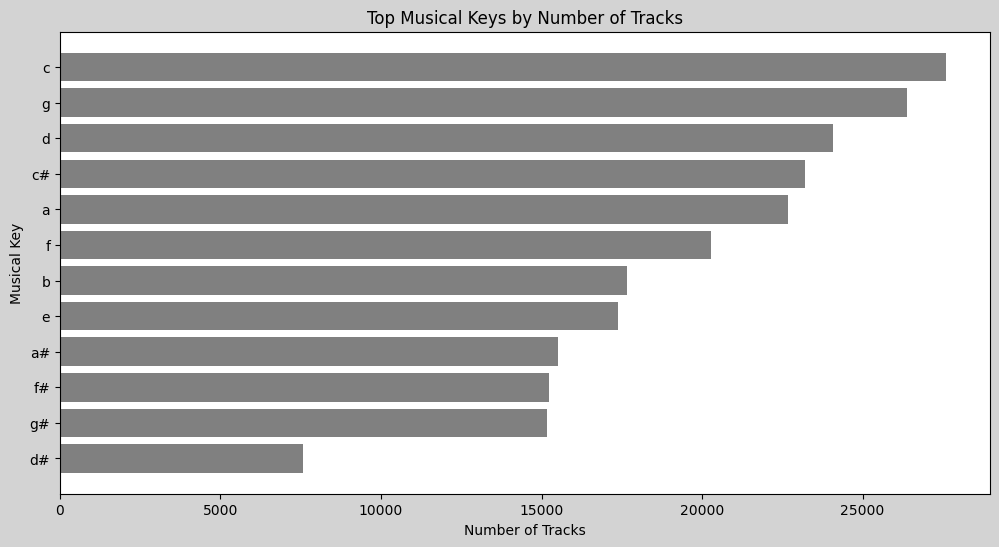

In [266]:
# Count the number of songs per key
key_counts = df['key'].value_counts().head(12)

plt.figure(figsize=(12,6), facecolor=lightgrey )
plt.barh(key_counts.index, key_counts.values, color=darkgrey)
plt.gca().invert_yaxis()
plt.title("Top Musical Keys by Number of Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Musical Key")
plt.savefig('C3.png', bbox_inches='tight')
plt.show()

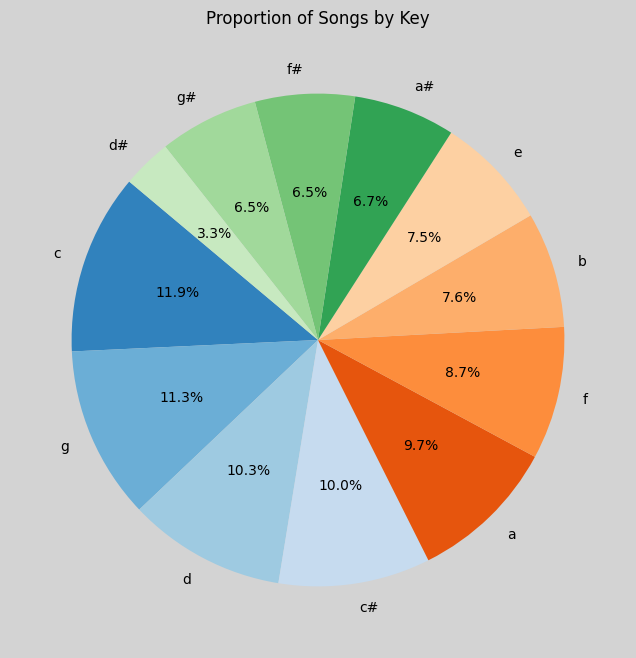

In [267]:
# Pie chart for top 15 artists by track count
top8 = key_counts.head(12)

plt.figure(figsize=(8,8), facecolor=lightgrey )
plt.pie(top8.values, labels=top8.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20c.colors)
plt.title("Proportion of Songs by Key")
plt.savefig('C4.png', bbox_inches='tight')
plt.show()



In [268]:
########################################################################################################################################################################
#
#
#
#                                                     TRACK POPULARITY
#
#
#
########################################################################################################################################################################

In [269]:
# Drop missing values in critical columns
df = df.dropna(subset=['track_name', 'popularity'])

# Standardize text (in case of inconsistent capitalization)
df['track_name'] = df['track_name'].str.lower().str.strip()

# Average popularity by genre
track_popularity = df.groupby('track_name')['popularity'].mean().reset_index()

# Sort for readability
track_popularity = track_popularity.sort_values(by='popularity', ascending=False)
print(track_popularity.head(25))

                                            track_name  popularity
2150                                           7 rings       100.0
140302                                            wow.        99.0
16560         break up with your girlfriend, i'm bored        99.0
24158                                        con calma        98.0
18567                                    calma - remix        97.0
114546   sunflower - spider-man: into the spider-verse        97.0
27202           dancing with a stranger (with normani)        97.0
115245                                sweet but psycho        97.0
116810  taki taki (with selena gomez, ozuna & cardi b)        96.0
77734                                     middle child        96.0
11086                                baila baila baila        95.0
77642                                mia (feat. drake)        95.0
118382                                   thank u, next        95.0
4275                                        adan y eva        

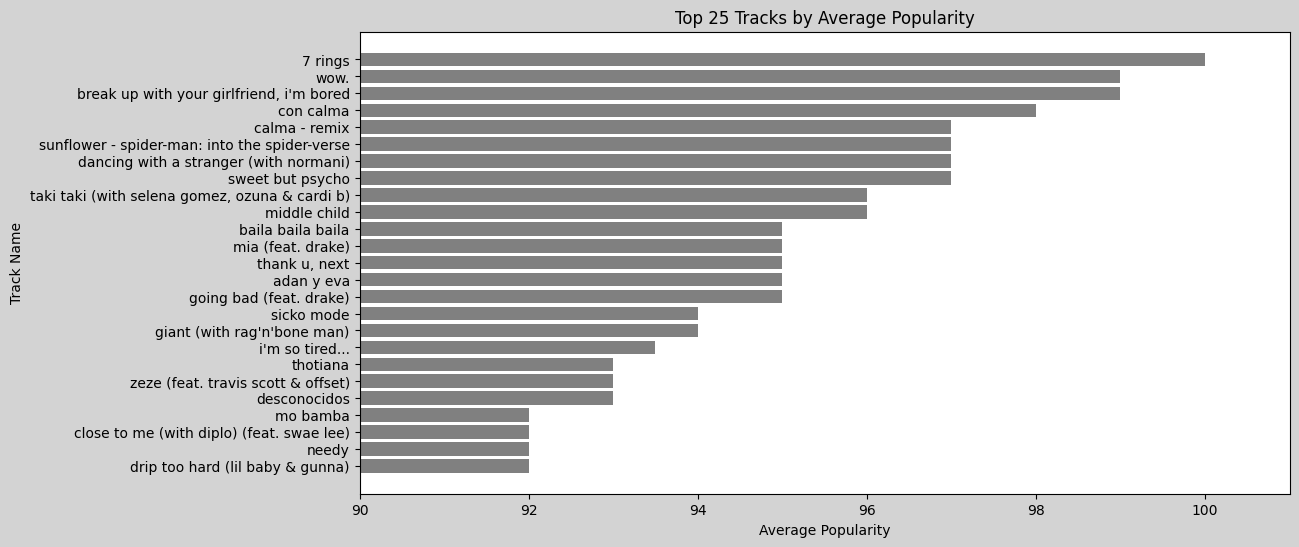

In [270]:
# Bar Chart - Top track by average popularity
top25 = track_popularity.head(25)

plt.figure(figsize=(12,6), facecolor=lightgrey )
plt.barh(top25['track_name'], top25['popularity'], color=darkgrey)
plt.gca().invert_yaxis()  # highest at top
plt.title("Top 25 Tracks by Average Popularity")
plt.xlabel("Average Popularity")
plt.ylabel("Track Name")
plt.xlim(xmin=90, xmax=101) 
plt.savefig('D1.png', bbox_inches='tight')
plt.show()

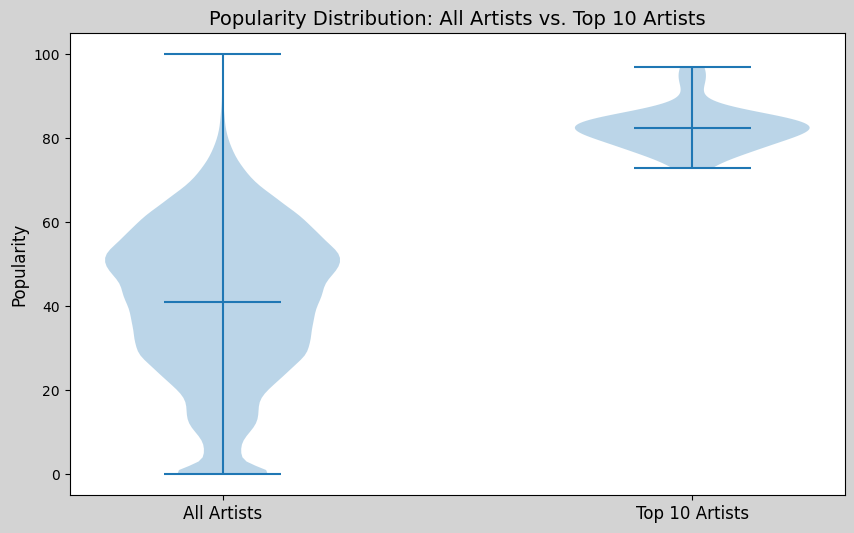

In [271]:
import matplotlib.pyplot as plt

# overall distribution
overall = df['popularity']

# top artist distribution
top_artists = (
    df.groupby('artist_name')['popularity']
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .index
)
df_top = df[df['artist_name'].isin(top_artists)]
top = df_top['popularity']

# combine for plotting
data = [overall, top]
labels = ["All Artists", "Top 10 Artists"]

plt.figure(figsize=(10,6), facecolor=lightgrey)
plt.violinplot(data, showmeans=True, showextrema=True)
plt.xticks([1, 2], labels, fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.title("Popularity Distribution: All Artists vs. Top 10 Artists", fontsize=14)

plt.savefig('B5.png', bbox_inches='tight')
plt.show()


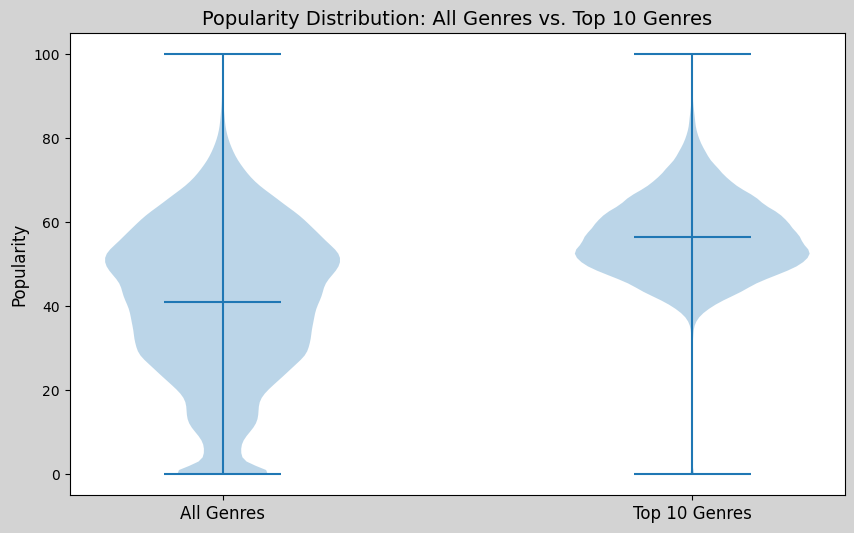

In [272]:
import matplotlib.pyplot as plt

# overall distribution
overall = df['popularity']

# top artist distribution
top_genres = (
    df.groupby('genre')['popularity']
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .index
)
df_top = df[df['genre'].isin(top_genres)]
top = df_top['popularity']

# combine for plotting
data = [overall, top]
labels = ["All Genres", "Top 10 Genres"]

plt.figure(figsize=(10,6), facecolor=lightgrey)
plt.violinplot(data, showmeans=True, showextrema=True)
plt.xticks([1, 2], labels, fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.title("Popularity Distribution: All Genres vs. Top 10 Genres", fontsize=14)

plt.savefig('A5.png', bbox_inches='tight')
plt.show()


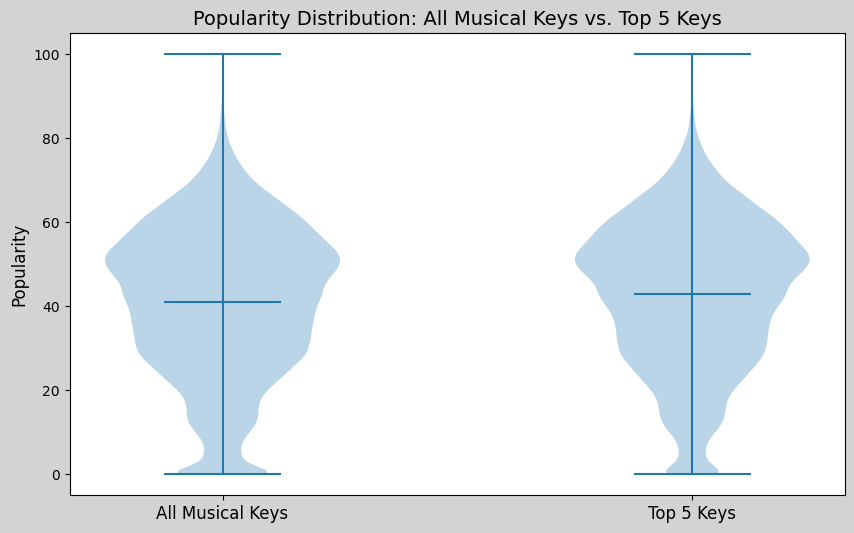

In [273]:
import matplotlib.pyplot as plt

# overall distribution
overall = df['popularity']

# top artist distribution
top_artists = (
    df.groupby('key')['popularity']
      .mean()
      .sort_values(ascending=False)
      .head(5)
      .index
)
df_top = df[df['key'].isin(top_artists)]
top = df_top['popularity']

# combine for plotting
data = [overall, top]
labels = ["All Musical Keys", "Top 5 Keys"]

plt.figure(figsize=(10,6), facecolor=lightgrey)
plt.violinplot(data, showmeans=True, showextrema=True)
plt.xticks([1, 2], labels, fontsize=12)
plt.ylabel("Popularity", fontsize=12)
plt.title("Popularity Distribution: All Musical Keys vs. Top 5 Keys", fontsize=14)

plt.savefig('C5.png', bbox_inches='tight')
plt.show()
